In [1]:
import pandas as pd
import re
import collections
import matplotlib.pyplot as plt
import numpy as np
from nltk.util import ngrams
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import chain
from random import randrange, uniform
import math
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("dns-traffic.20140614.txt",nrows=10000,sep="\t")
data.drop(data.columns[[0, 1, 2, 3, 4]], axis=1,inplace=True)
data.columns = ['UserId','Domain1','Domain']
print(data.head(20))

    UserId                      Domain1  \
0      150  11.117.163.70.in-addr.arpa.   
1     3600     117.163.70.in-addr.arpa.   
2     3600           ns1.mm.ks.cox.net.   
3   172800   236.25.37.81.in-addr.arpa.   
4   172800       25.37.81.in-addr.arpa.   
5   172800       25.37.81.in-addr.arpa.   
6    86400     85.128.179.in-addr.arpa.   
7    86400     85.128.179.in-addr.arpa.   
8    86400     85.128.179.in-addr.arpa.   
9    86400     85.128.179.in-addr.arpa.   
10    3600         84.120.in-addr.arpa.   
11   86400     224.163.69.in-addr.arpa.   
12   86400     224.163.69.in-addr.arpa.   
13   86400     224.163.69.in-addr.arpa.   
14   47222          57.27.in-addr.arpa.   
15   47222          57.27.in-addr.arpa.   
16   86400     aaadel.mantraonline.com.   
17   86400     aaadel.mantraonline.com.   
18   86400     dnsdel.mantraonline.com.   
19   86400     dnsdel.mantraonline.com.   

                                      Domain  
0          mtae448c7100586.mm.ks.ks.cox.net.  
1 

In [3]:
for i in range(data['Domain'].shape[0]):
    if re.search("^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$",data['Domain'][i]) or re.search(":",data['Domain'][i]):
        temp = data['Domain1'][i]
        data.loc[i,('Domain')] = temp
    if re.search(r"\.$",data['Domain'][i]): 
        value = data['Domain'][i][:-1]
        data.loc[i,('Domain')] = value

data.drop(data.columns[1], axis=1,inplace=True)
print(data.head(20))

    UserId                                   Domain
0      150         mtae448c7100586.mm.ks.ks.cox.net
1     3600                        ns1.mm.ks.cox.net
2     3600                        ns1.mm.ks.cox.net
3   172800  236.Red-81-37-25.dynamicIP.rima-tde.net
4   172800                  rsdmno1-14.rima-tde.net
5   172800                  rsdbgi1-11.rima-tde.net
6    86400                     COMPRIDO.VIVO.COM.BR
7    86400                   PINHEIROS2.VIVO.COM.BR
8    86400                       GUANDU.VIVO.COM.BR
9    86400                       TIETE2.VIVO.COM.BR
10    3600                           ns1.cnc-gd.net
11   86400                        ns3.dreamhost.com
12   86400                        ns1.dreamhost.com
13   86400                        ns2.dreamhost.com
14   47222                  dnsdel.mantraonline.com
15   47222                  aaadel.mantraonline.com
16   86400                  aaadel.mantraonline.com
17   86400                  aaadel.mantraonline.com
18   86400  

In [4]:
whiteList = pd.read_csv('top-1m.csv',header=None,names=['Domain'])
print(whiteList.head(20))

           Domain
1      google.com
2     youtube.com
3       tmall.com
4       baidu.com
5          qq.com
6        sohu.com
7    facebook.com
8      taobao.com
9          360.cn
10         jd.com
11      yahoo.com
12     amazon.com
13    sina.com.cn
14  wikipedia.org
15      weibo.com
16  xinhuanet.com
17    netflix.com
18     reddit.com
19       live.com
20     alipay.com


In [5]:
#DOMAIN FILTERING

#1.WhiteList filtering

tempList = whiteList.head(100).values
actualList=[]
for i in tempList:
    for j in i:
        actualList.append("[a-zA-Z0-9]*."+j)
        
reduceList=data.values
domainList=[]
dataList=[]
for i in reduceList:
    flag=0
    for j in actualList:
        if re.search(j,i[1]):
            flag=1
            break
    if flag==0:
        domainList.append(list(i)[1])
        dataList.append(i)

print("The number of remaining domain list is",len(domainList))

The number of remaining domain list is 9990


[(('.c', 'co'), 740), (('co', 'om'), 711), (('e.', '.c'), 113), (('s.', '.c'), 81), (('n.', '.c'), 63)]


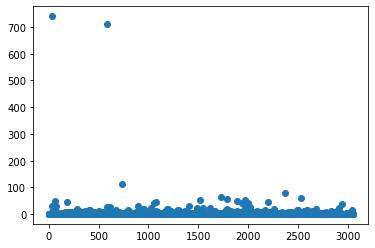

The first whiteList domain and its probability
google.com   0.5117395944503731


In [6]:
#n-gram frequencies

#FOR WHITELIST
tokens = whiteList['Domain'].head(1000)
dictionary={}
probList=[]
for i in tokens:
    dumm = [i[j:j+2] for j in range(len(i)-1)]
    probList.append(dumm)
    bgs = ngrams(dumm,2)
    frequencies = collections.Counter(bgs)
    for j in frequencies:
        if j not in dictionary:
            dictionary[j]=frequencies[j]
        else:
            dictionary[j]+=frequencies[j]
            
print(collections.Counter(dictionary).most_common(5))

keys = list(dictionary.keys())
values = list(dictionary.values())

total_sum = sum(dictionary.values())
probabilities=[]
for i in probList:
    summation=0
    for j in i:
        subset_dict = [key for key in keys if j in key]
        for k in subset_dict:
            summation+=(dictionary[k]/total_sum)
    probabilities.append(summation)

res = '#'.join(map(str, keys))
keys = res.split('#')
number = preprocessing.LabelEncoder()
dumm = number.fit_transform(keys)

x = np.array(dumm)
y = np.array(values)

plt.scatter(x, y)
plt.show()

print("The first whiteList domain and its probability")
print(whiteList['Domain'].iloc[0]," ",probabilities[0])

[(('ne', 'et'), 526), (('.n', 'ne'), 475), (('ve', 'er'), 446), (('se', 'er'), 445), (('er', 'rv'), 442)]


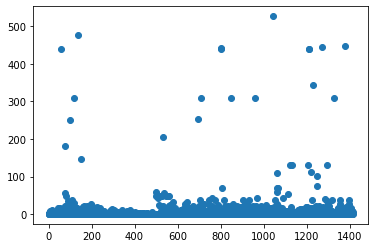

The first DGA domain and its probability
mtae448c7100586.mm.ks.ks.cox.net   0.4131992457573854


In [7]:

#FOR DOMAINLIST
tokens = domainList[:1000]
dictionary={}
probList=[]
for i in tokens:
    dumm = [i[j:j+2] for j in range(len(i)-1)]
    probList.append(dumm)
    bgs = ngrams(dumm,2)
    frequencies = collections.Counter(bgs)
    for j in frequencies:
        if j not in dictionary:
            dictionary[j]=frequencies[j]
        else:
            dictionary[j]+=frequencies[j]
            
print(collections.Counter(dictionary).most_common(5))

keys = list(dictionary.keys())
values = list(dictionary.values())

total_sum = sum(dictionary.values())
probabilities=[]
for i in probList:
    summation=0
    for j in i:
        subset_dict = [key for key in keys if j in key]
        for k in subset_dict:
            summation+=(dictionary[k]/total_sum)
    probabilities.append(summation)

res = '#'.join(map(str, keys))
keys = res.split('#')
number = preprocessing.LabelEncoder()
dumm = number.fit_transform(keys)

x = np.array(dumm)
y = np.array(values)

plt.scatter(x, y)
plt.show()

print("The first DGA domain and its probability")
print(domainList[0]," ",probabilities[0])

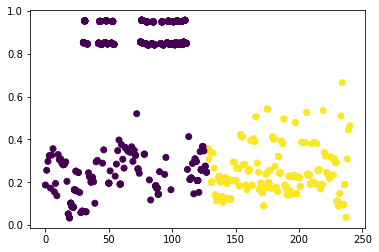

The count of non-benign domains is 633
The count of benign domains is 367


In [8]:
#2. k-means clustering

domainsList = domainList[:1000]
clustList = number.fit_transform(domainsList)
trainList=[]
for i in range(len(clustList)):
    trainList.append([clustList[i],probabilities[i]])
training_set = np.array(trainList)

kmeans = KMeans(n_clusters=2,max_iter=300)
kmeans.fit(training_set)
labels = kmeans.labels_
labels=list(labels)


plt.scatter(training_set[:,0], training_set[:,1], c=labels)  
plt.show()

print("The count of non-benign domains is",labels.count(0))
print("The count of benign domains is",labels.count(1))

filteredOutput=[]
sideOutput=[]
for i in range(len(labels)):
    if labels[i] == 0:
        filteredOutput.append(domainList[i])
        sideOutput.append(dataList[i][0])

[ 0  1  2  2  2  2 -1 -1  2  2  3  3  4  5  6 -1 -1 -1 -1  7 -1 -1  8  9
  8  9  8  9  8  9  8  9  8  9  8  9  8  9 10 11 -1 11 -1  7  7 -1 -1 -1
  1 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 23 23 19 19 24 17 14 26
 16 25 15 20 22 18 21 27 28 29 30 31 32 33 34 35 36 37 38 39 40 40 41 41
 42 42 43 43 -1 44 44 -1 45 45 46 46 47 47 48 48 16 16 49 49 -1 -1 50 -1
  6 51 52 53 54 55 52 53 54 55 54 56 57 55 51 51 12 53  2  2 58 13 59 60
  2  7  7  7 58 50 50  2 61 62 63 64 65 37 66 67 68 69 70 57 71 61 62 63
 64 65 37 66 67 68 69 70 57 71 61 62 28 27 32 31 34 39 37 35 30 36 29 38
 33 28 27 32 31 34 39 37 35 30 36 29 38 33 28 27 32 31 39 35 30 36 29 38
 33 61 62 63 64 65 37 66 67 68 69 70 57 71 61 62 63 64 65 37 66 67 68 69
 70 57 71 61 62 61 62 63 64 65 37 66 67 68 69 70 57 71 61 62 63 64 65 37
 66 67 68 69 70 57 71 61 62 61 62 63 64 65 37 66 67 68 69 70 57 71 61 62
 63 64 65 37 66 67 68 69 70 57 71 61 62  2  2  2  2  2 -1  2 58 13 59 60
 72 72 72 72 50 -1 -1 -1 51 -1  8  9  8  9 -1 13  2

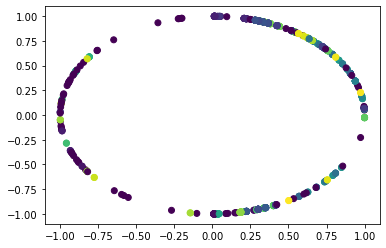

In [9]:
#DOMAIN CLUSTERING

list1 = number.fit_transform(sideOutput)
list2 = number.fit_transform(filteredOutput)

inp = pd.DataFrame(list(zip(list1,list2)),columns=['Users','Domain'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inp)
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized, columns=['Users','Domain'])

db_default = DBSCAN(eps = 0.00375, min_samples = 2).fit(X_normalized)
new_labels = db_default.labels_

print(new_labels)
new_labels = list(new_labels)
print("\nThe number of unique clusters  -",(len(collections.Counter(new_labels).keys())-1))
print("The number of noise values(-1) -",new_labels.count(-1))

plt.scatter(X_normalized['Users'], X_normalized['Domain'], c=new_labels)  
plt.show()

In [10]:
new_dictionary={}
for i in range(len(new_labels)):
    if new_labels[i]!=-1:
        if new_labels[i] not in new_dictionary:
            new_dictionary[new_labels[i]] = [[sideOutput[i],filteredOutput[i]]]
        else:
            new_dictionary[new_labels[i]].append([sideOutput[i],filteredOutput[i]])

print("The list of clusters are ",end="")
print(list(new_dictionary.keys()))

The list of clusters are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]


In [11]:
#COLLABORATIVE FILTERING

dgaDomains = pd.read_csv('dga_domains.csv',nrows=100)
dgaDomains.drop(['DGA_family','Type'], axis=1,inplace=True)
dgaDomains['Score'] = 1.0
print(dgaDomains.head())


              Domain  Score
0  bqwqeiswupyny.com    1.0
1  oocevdwyruhdi.net    1.0
2  xhlwkqdawjdpi.biz    1.0
3   lfqkclhctolfi.ru    1.0
4  yybxvbcxxehhy.org    1.0


In [12]:
#Assign score values for clusters

for i in range(len(new_dictionary)):
    score = round(uniform(0.6, 0.8),2)
    for j in range(len(new_dictionary[i])):
        if new_dictionary[i][j][1] in list(dgaDomains['Domain']):
            new_dictionary[i][j].append(1.0)
        else:
            new_dictionary[i][j].append(score)

print(new_dictionary)

{0: [[150, 'mtae448c7100586.mm.ks.ks.cox.net', 0.73], [10800, 'i5DB53810.pool.tripleplugandplay.com', 0.73]], 1: [[172800, '236.Red-81-37-25.dynamicIP.rima-tde.net', 0.8], [172800, '235.Red-88-19-231.staticIP.rima-tde.net', 0.8], [172800, '238.Red-81-39-13.dynamicIP.rima-tde.net', 0.8]], 2: [[86400, 'COMPRIDO.VIVO.COM.BR', 0.74], [86400, 'PINHEIROS2.VIVO.COM.BR', 0.74], [86400, 'GUANDU.VIVO.COM.BR', 0.74], [86400, 'TIETE2.VIVO.COM.BR', 0.74], [86400, 'aaadel.mantraonline.com', 0.74], [86400, 'aaadel.mantraonline.com', 0.74], [86400, 'a2-16-225-237.deploy.akamaitechnologies.com', 0.74], [86400, '179-128-85-14.user.vivozap.com.br', 0.74], [86400, '178-165-116-14-kh.maxnet.ua', 0.74], [86400, 'ABTS-KK-static-013.61.166.122.airtelbroadband.in', 0.74], [86400, '122.54.79.237.pldt.net', 0.74], [86400, 'NS1.pldt.net', 0.74], [86400, 'NS2.pldt.net', 0.74], [86400, 'NS1.pldt.net', 0.74], [86400, 'NS2.pldt.net', 0.74], [86400, '177-196-66-237.user.vivozap.com.br', 0.74], [86400, 'TIETE2.VIVO.COM

In [13]:
#Finding scores for users

users=[]
for i in range(len(new_dictionary)):
    for j in range(len(new_dictionary[i])):
        if new_dictionary[i][j][0] not in users:
            users.append(new_dictionary[i][j][0])

maxi=[]
domain=[]
domainDict={}
for i in users:
    temp=0
    dom=""
    for j in range(len(new_dictionary)):
        for k in range(len(new_dictionary[j])):
            if new_dictionary[j][k][0] not in domainDict:
                domainDict[new_dictionary[j][k][0]] = [new_dictionary[j][k][1]]
            else:
                domainDict[new_dictionary[j][k][0]].append(new_dictionary[j][k][1])
            if new_dictionary[j][k][0] == i:
                if new_dictionary[j][k][2] > temp:
                    temp = new_dictionary[j][k][2]
                    dom = new_dictionary[j][k][1]
    
    maxi.append(temp)
    domain.append(dom)

    
from texttable import Texttable

tableList=[]
tableList.append(["User Ids","Scores","Domain"])

for i in range(len(users)):
    maxi[i]=round(pow(maxi[i],2),2)
    tableList.append([users[i],maxi[i],domain[i]])

print("\n\t\tScores Table")
table = Texttable()
table.add_rows(tableList)
print(table.draw())
print("\n")



		Scores Table
+----------+--------+-----------------------------------------+
| User Ids | Scores |                 Domain                  |
+==========+========+=========================================+
| 150      | 0.530  | mtae448c7100586.mm.ks.ks.cox.net        |
+----------+--------+-----------------------------------------+
| 10800    | 0.530  | i5DB53810.pool.tripleplugandplay.com    |
+----------+--------+-----------------------------------------+
| 172800   | 0.640  | 236.Red-81-37-25.dynamicIP.rima-tde.net |
+----------+--------+-----------------------------------------+
| 86400    | 0.620  | gulp.arnet.com.ar                       |
+----------+--------+-----------------------------------------+
| 14400    | 0.550  | apache2-ps42489.ps42489.dreamhostps.com |
+----------+--------+-----------------------------------------+
| 23613    | 0.550  | b.root-servers.net                      |
+----------+--------+-----------------------------------------+
| 7200     | 0.610  | dn

In [14]:
def cosine_similarity(c1, c2):
    terms = len(c1)
    dotprod = sum(c1[k] * c2[k] for k in range(terms))
    magA = math.sqrt(sum(c1[k]**2 for k in range(terms)))
    magB = math.sqrt(sum(c2[k]**2 for k in range(terms)))
    return dotprod / (magA * magB)

domainNames = domainDict[3600][:39] + domainDict[7200]
domainNames = number.fit_transform(domainNames)
user1 = domainNames[:39]
user2 = domainNames[39:]

print("The similarity between the user 3600 and user 7200 is ",end="")
print(cosine_similarity(user1,user2))

The similarity between the user 3600 and user 7200 is 0.883414931347818
